# Programming for Data Analysis
## Autumn 2021 Assignment
___

<br>

![NumPy_logo](Images/NumPy_logo.png)

<br>

## numpy.random 

Numpy.random is a module within the bigger NumPy package which allows us to sample **pseudo-random** numbers and gives us a range of tools to implement them. Although there already is a random module in the Python standard library, numpy.random adds much extra functionality in particular in relation to arrays and has the ability to draw from a lot more statistical distributions. Computers can't really 'do random' - they need a set of instructions to produce an output - so programs like numpy.random use algorithims to generate random numbers. Thus they are not truly random but pseudo-random. This also means they are predictable and also reproducible with is of much benefit when running experimental code.

<br> 

### NumPy

NumPy is the primary python library for working with arrays. The name itself comes from Numerical Python, and it has become the fundamental package for scientific computing and also the foundation for many other analytic libraries in the python language.

> "NumPy ... is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."  
https://en.wikipedia.org/wiki/NumPy

<br>

### Simple random data

The numpy.random module has been updated recently so I will mostly be concentrating on the newer version and methods. All of the older methods are still supported, and I may be using some of them to demonstrate some aspects of the library. We begin by importing numpy, as per comvention and economy of space as **np**.

In [1]:
# importing NumPy
import numpy as np

# importing matplotlib.pyplot for plotting and visualisations
import matplotlib.pyplot as plt

# Creating a default figure size
plt.rcParams['figure.figsize']=[12,8]

Numpy creates random numbers through the use of a **BitGenerator** and a **Generator** - the BitGenerator generates random sequences of bits which are transformed into values by the generator using a variety of distributions.
We can create a new constructor using the **default_rng** method to get a new instance of a generator.  

In [2]:
# using default_rng() to get a new random number generator
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7FBBAF057820

The default bitgenerator is PCG64 which is a 128-bit implementation of **O’Neill’s permutation congruential generator**.  
> "PCG is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict."  
https://www.pcg-random.org/index.html

We can pass a seed to the generator or let the computer pull a number from the operating system. More about that later!

<br>

**numpy.random.default_rng.random** returns floating point numbers. If no value is passed we get one randomly generated float. If one value is passed we get an array of that length, and if a second value is passed (with extra brackets) we get a 2D array with those parameters.

In [3]:
# returns a single float
x = rng.random()
print(x)

0.47639559535376885


In [4]:
# returns an array of 3 floats
y = rng.random(3)
print(y)

[0.43686036 0.48492765 0.95408593]


In [5]:
# returns an array of 3x3 floats
z = rng.random((3,3))
print(z)

[[0.12139324 0.12341798 0.21948752]
 [0.21833382 0.87880707 0.79814803]
 [0.25734137 0.10364705 0.05595304]]


<br>

**numpy.random.default_rng.integers** returns integers. If we pass 1 value, that will be the upper limit and non inclusive. 0 is the default lower limit. If we pass 2 values, the first will be the lower limit and the 2nd the upper. 3 values, and the third will be the amount of numbers creating an array.

In [6]:
# returns an integer between 0-9
x = rng.integers(10)
print(x)

3


In [7]:
y = rng.integers(3,10)
print(y)

5


In [8]:
# returns an array of 20 numbers between 2-9
z = rng.integers(2,10,20)
print(z)

[7 3 2 2 8 4 6 5 2 6 5 6 2 2 4 7 2 8 3 4]


For all of the above code, if we rerun it we will get different results each time. If we want reproducible results we need to pass in a **seed**. We will look at this in more detail later.

<br>

#### Permutations

<br>

Within the numpy.random library there are many methods we can use to randomly manipulate the generated or given data. **permutation()** and **shuffle()** both rearrange the order of an array. The main difference is that permutation creates a new array while shuffle alters the original array.

In [9]:
# creating an array of numbers 1 to 10
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# random permutation
rng.permutation(arr)

array([5, 2, 4, 7, 9, 8, 1, 6, 3])

In [10]:
# the original array is intact
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# 'shuffles' the array and alters the original
rng.shuffle(arr)
arr

array([9, 2, 4, 7, 1, 8, 3, 6, 5])

We can use permutation to create a random array from a range

In [12]:
# creates a permutation of the numbers 0-19
print(rng.permutation(20))

[13 16  6  1 12 10  4 19  5 14 18  8  0 17  9  2 15 11  7  3]


We can also use it on 2 dimensional arrays. Interestingly it maintains the numbers and order within each row and only rearranges the actual rows. If we add the parameter axis=1 we can permutate within the rows also

In [13]:
# creates 12 numbers and shapes them into a 3x4 arrany
array = np.arange(12).reshape((3, 4))

# prints the array
print(array)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [14]:
# permutates the 2D array - rows only
rng.permutation(array)

array([[ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [15]:
# permutates the 2D array - rows and within rows
rng.permutation(array, axis=1)

array([[ 0,  2,  3,  1],
       [ 4,  6,  7,  5],
       [ 8, 10, 11,  9]])

In [16]:
# just to confirm the original array is intact
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can do the same using the shuffle method - again the main difference being shuffle alters the original array.

In [17]:
# shuffles the array
rng.shuffle(array, axis=1)
array

array([[ 1,  3,  0,  2],
       [ 5,  7,  4,  6],
       [ 9, 11,  8, 10]])

In [18]:
# just to confirm the array is now altered
array

array([[ 1,  3,  0,  2],
       [ 5,  7,  4,  6],
       [ 9, 11,  8, 10]])

<br>

A few other interesting methods available to us

**numpy.random.default_rng.choice** generates a random sample from a given array. The first value in brackets is the upper range, while the 2nd is the number of values returned.

In [19]:
# choose 7 numbers at random from the range 0-39
rng.choice(40, 7)

array([10, 28, 12, 24, 20, 27, 17])

**numpy.random.default_rng.bytes** returns random bytes

In [20]:
# returns 10 random bytes!
rng.bytes(10)

b'\xa5Le;\x8b\x8e\x9c\xf7\x10j'

<br>

## Distributions
___

Probability distributions are how values are distributed within a given range or criteria. I will go through several of the more common examples.

### Uniform Distribution

This is where each event has an equal chance of occurring, such as rolling a single dice or choosing a particular playing card from the deck.
The basic syntax is as follows - the default parameters are 0.0 and 1.0 so the following code will return a floating point number between those two values. The uniform distribution dictates that the value has an equal chance of falling at any point between the 2.

In [21]:
# return a floating point number between 0.0 and 1.0
x = rng.uniform()
x

0.579785397109685

We can pass some parameters in then

In [22]:
# returns a floating point number between 0.0 and 4.0
x = rng.uniform(4)
x

2.43675821088086

In [23]:
# return a floating point number between 3.0 and 4.0
x = rng.uniform(3,4)
x

3.8229705377105763

In [24]:
# returns a 2D array of floating point numbers between 10.0 and 15.0
x = rng.uniform(10, 15, size=(4, 3))
x

array([[13.29994236, 14.06898811, 12.28743847],
       [10.04764216, 11.68401663, 13.67667612],
       [10.68608475, 10.52884686, 10.55238236],
       [14.7704113 , 12.508594  , 12.62513446]])

<br>

#### Sample size

The following code creates various sizes of arrays of values between 0 and 100. In theory there's an equal chance for each value to occur but this only becomes obvious when we increase the smaple size. The set of plots below demonstrate that clearly. The final plot which has a sample of 1 million values is nearly a straight line.

In [25]:
# looking at the difference the sample size makes
x = rng.integers(100, size = 10)
y = rng.integers(100, size = 100)
z = rng.integers(100, size = 1000)
a = rng.integers(100, size = 10000)
b = rng.integers(100, size = 100000)
c = rng.integers(100, size = 1000000)

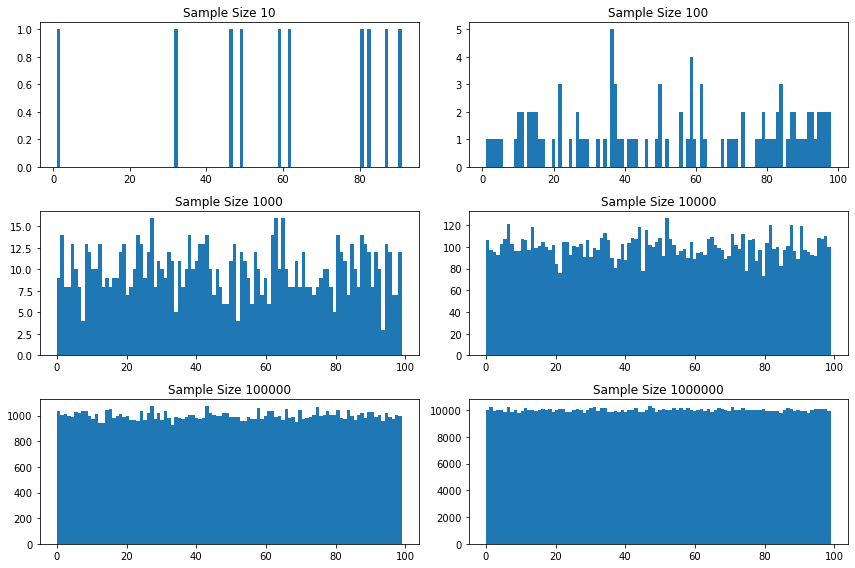

In [26]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x, bins=100)
axs[0,0].set_title('Sample Size 10')
axs[0,1].hist(y, bins=100)
axs[0,1].set_title('Sample Size 100')
axs[1,0].hist(z, bins=100)
axs[1,0].set_title('Sample Size 1000')
axs[1,1].hist(a, bins=100)
axs[1,1].set_title('Sample Size 10000')
axs[2,0].hist(b, bins=100)
axs[2,0].set_title('Sample Size 100000')
axs[2,1].hist(c, bins=100)
axs[2,1].set_title('Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()

Another example below, this time specifying a lower minus value. As above if no lower value is set then zero is the default.

In [27]:
# range is -1 to 0, and we're getting 1000 numbers
np.random.uniform(-1,0,1000)

array([-0.82239971, -0.08795583, -0.15051123, -0.93983679, -0.05292415,
       -0.49691097, -0.64764632, -0.76763125, -0.45182153, -0.9730729 ,
       -0.74113876, -0.62211038, -0.02236362, -0.31725112, -0.87527775,
       -0.25642261, -0.39059318, -0.53124508, -0.70864759, -0.88551091,
       -0.99764229, -0.88077645, -0.97212449, -0.65144911, -0.70991846,
       -0.30307532, -0.62555603, -0.69681965, -0.36487038, -0.17576318,
       -0.91461993, -0.77506969, -0.14443379, -0.69816492, -0.44098125,
       -0.91870252, -0.46668159, -0.25364774, -0.32913408, -0.76475035,
       -0.87141571, -0.28031119, -0.59038263, -0.23884585, -0.22554871,
       -0.20532129, -0.41306026, -0.1059316 , -0.78038729, -0.67819638,
       -0.39935879, -0.7710401 , -0.52578298, -0.0903194 , -0.12344574,
       -0.4318455 , -0.74085062, -0.0626271 , -0.67819251, -0.2924391 ,
       -0.76959901, -0.47531001, -0.66007876, -0.24515384, -0.47420854,
       -0.3390831 , -0.31661043, -0.8088203 , -0.75444866, -0.84

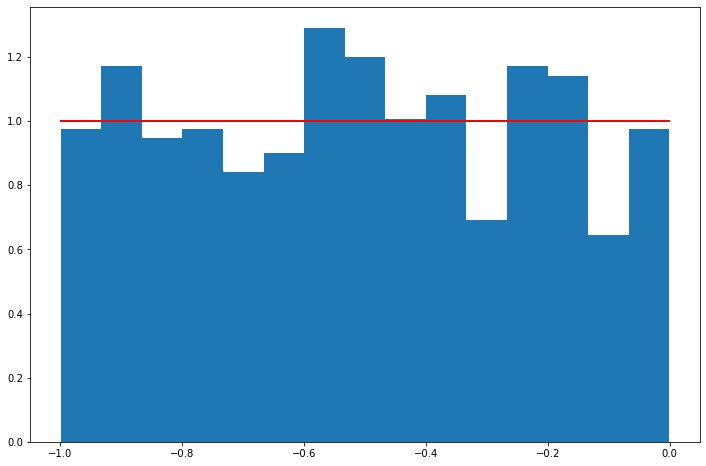

In [28]:
# visualise
y = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(y, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r') # include a red line to show the average

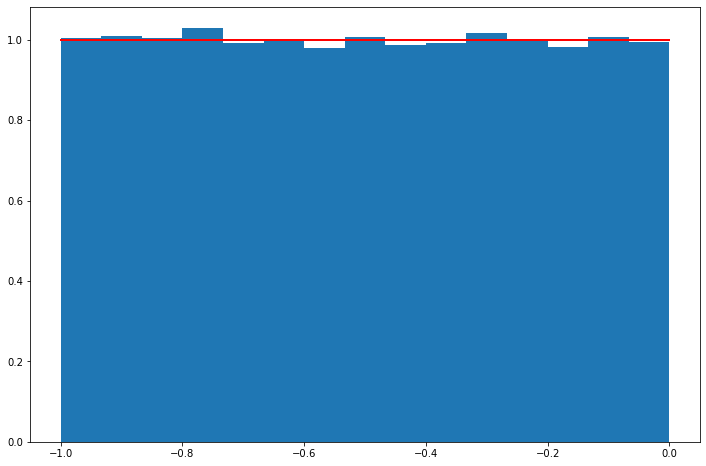

In [29]:
# the more times we run it the flatter the line at the top
x = np.random.uniform(-1,0,100000)

count, bins, ignored = plt.hist(x, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

## Normal distribution

![Normal_Dist](Images/standardNormal2.png)

Normal distribution represents the behavior of most of the situations in the universe - that's why it’s called a “normal” distribution. I guess! Also know as Standard Normal, Gaussian Distribution or Bell Curve, it is one of the widest used distributions. It represents things like IQ Scores and heartbeats among others.  
The parameters are as follows:
1) mean - peak of the bell curve
2) standard deviation - distance from the mean
3) size - shape of the array  

If no paremters are passed a single value will be returned using a mean of 0 and standard deviation of 1

In [31]:
x = rng.standard_normal()
x

-0.3166771144536574

In [32]:
# (10,100,10000) 1st value is mean, 2nd is SD, 3rd of amount of numbers returned
z = np.random.normal(10, 100, 10000)
z

array([  7.77071815,  76.58082238,  18.22600761, ..., -18.41623156,
        25.59933301,  77.60335021])

(array([  76.,  336., 1087., 2240., 2886., 2100.,  944.,  281.,   45.,
           5.]),
 array([-303.05669637, -232.24075043, -161.42480448,  -90.60885853,
         -19.79291258,   51.02303337,  121.83897932,  192.65492526,
         263.47087121,  334.28681716,  405.10276311]),
 <BarContainer object of 10 artists>)

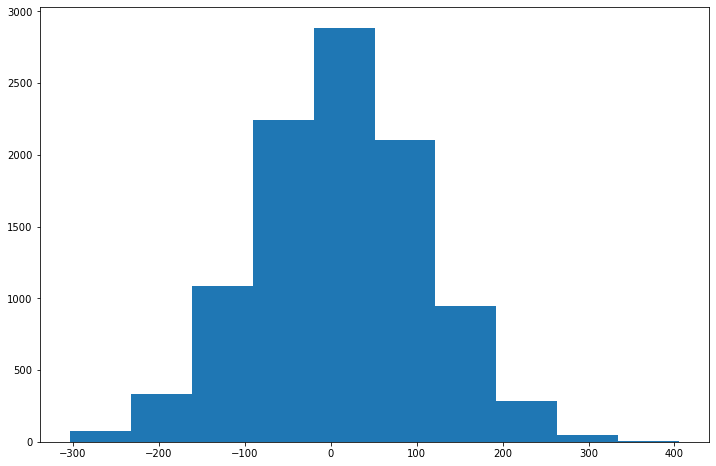

In [33]:
# creates a histogram for z
plt.hist(z)

## Binomial Distribution

Binomial distribution is when we're dealing with only 2 outcomes. These can be equal such as a coin toss as demomstrated below. Or if we know the probability of an outcome we can insert that as in the second example.

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

#### coin toss

In [34]:
>>> n, p = 10, .5  # n= number of trials, p = probability of each trial
>>> s = np.random.binomial(n, p, 1000)
# s = result of flipping a coin 10 times (either heads/tails), tested 1000 times.
s

array([ 5,  7,  5,  6,  2,  3,  4,  6,  6,  3,  4,  5,  7,  6,  2,  6,  6,
        5,  6,  3,  8,  4,  6,  3,  4,  3,  5,  4,  7,  4,  5,  6,  6,  5,
        7,  3,  6,  3,  5,  6,  6,  5,  6,  5,  6,  4,  6,  7, 10,  7,  5,
        3,  5,  4,  6,  6,  4,  4,  7,  3,  2,  5,  5,  9,  5,  7,  4,  7,
        7,  4,  4,  7,  6,  5,  2,  6,  7,  5,  5,  5,  8,  5,  4,  5,  3,
        4,  6,  3,  4,  3,  4,  5,  6,  3,  3,  4,  4,  6,  5,  5,  3,  4,
        5,  6,  5,  5,  3,  3,  7,  4,  7,  6,  4,  3,  7,  5,  5,  4,  6,
        5,  5,  7,  6,  7,  7,  4,  6,  4,  5,  5,  6,  3,  5,  2,  3,  6,
        6,  8,  6,  5,  4,  5,  6,  6,  3,  6,  5,  4,  4,  3,  6,  6,  8,
        4,  5,  4,  4,  8,  6,  7,  5,  5,  6,  4,  6,  7,  4,  6,  3,  6,
        5,  5,  5,  5,  6,  6,  4,  4,  5,  3,  6,  4,  5,  4,  5,  3,  7,
        7,  4,  3,  4,  6,  8,  7,  5,  3,  7,  8,  5,  7,  4,  6,  4,  4,
        4,  5,  7,  6,  9,  6,  8,  4,  4,  5,  5,  5,  3,  7,  5,  5,  8,
        3,  5,  7,  6,  4

(array([  2.,  13.,  39., 122., 193., 262., 205., 111.,  41.,  12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

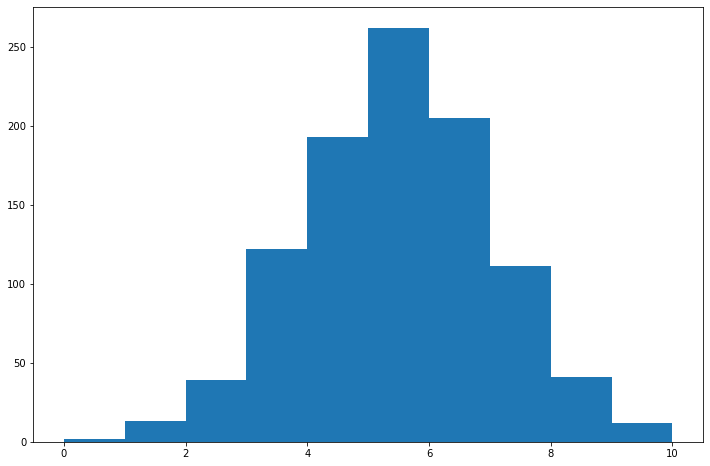

In [35]:
# Plotted
plt.hist(s)

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [36]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.

0.3844

(array([7.650e+03, 7.789e+03, 0.000e+00, 3.506e+03, 0.000e+00, 8.900e+02,
        1.460e+02, 0.000e+00, 1.800e+01, 1.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

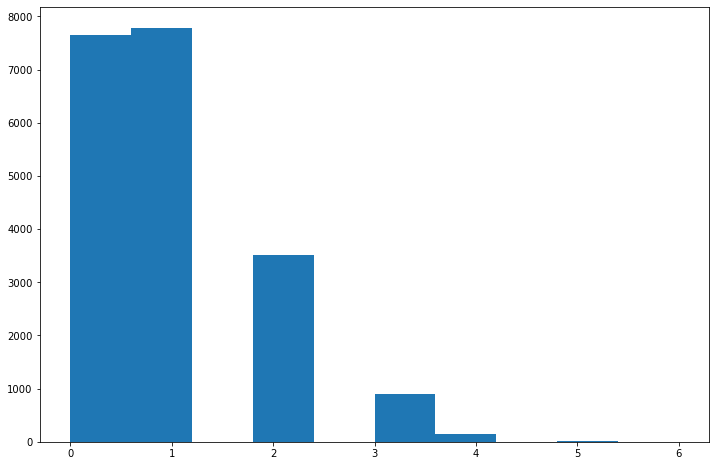

In [37]:
# to visualise that
a = np.random.binomial(9, 0.1, 20000)
plt.hist(a)

## Poisson Distribution

Not quite sure what this is about! :)

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

(array([ 394., 2210., 1693., 3251., 1057., 1035.,  289.,   47.,   20.,
           4.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

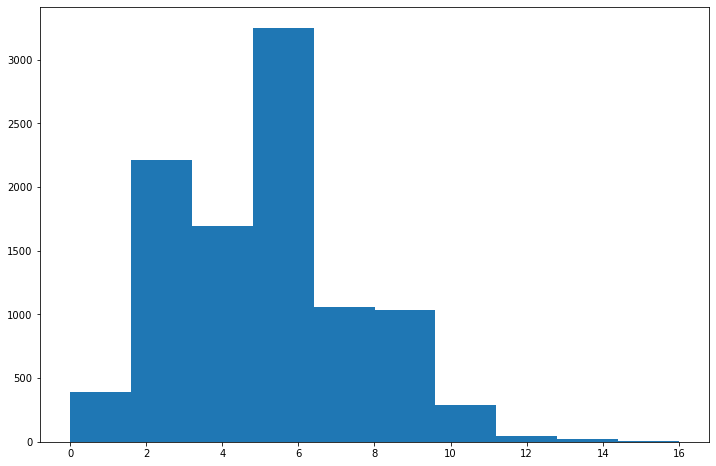

In [38]:
rng = np.random.default_rng()
s = rng.poisson(5, 10000)
plt.hist(s)

## Exponential Distribution

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

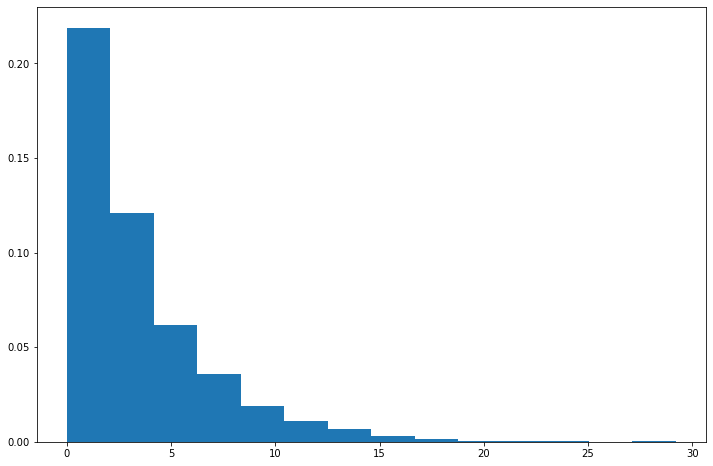

In [39]:
gfg = np.random.exponential(3.45, 10000)
  
count, bins, ignored = plt.hist(gfg, 14, density = True)
plt.show()

The following is a basic introduction as to how it works

In [40]:
# creates a variable which is a random integer between 0 and 4 with 4 being non-inclusive
result = np.random.randint(4)

result

3

If we want to create a random float we use rand

In [41]:
# creates a random floating point number
result = np.random.rand(4)

result

array([0.55562108, 0.54016892, 0.49165381, 0.65019966])

In [42]:
# we can then add more parameters
# this an array comprising a list 3 lists each containing 4 floats
result = np.random.rand(3,4)

result

array([[0.80705297, 0.44357977, 0.72410138, 0.52642626],
       [0.24648341, 0.74211474, 0.47826989, 0.68739161],
       [0.12039327, 0.0614055 , 0.84016287, 0.61254945]])

In [43]:
# creates a variable which is an array of 5 random integers between 0 and 4
result = np.random.randint(1, 4, size=5)

result

array([2, 1, 3, 1, 1])

In [44]:
# seed random number generator
np.random.seed(1)
# generate some random numbers
x= np.random.rand(3)
# # reset the seed
np.random.seed(1)
# # generate some random numbers
x

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

In [45]:
# Creates an array of 10 floats from the standard/normal/Gaussian distribution
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
result = np.random.randn(10)

result

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038])

In [46]:
# creates a sequence from 0-19
sequence = [i for i in range(20)]
print(sequence)
# randomly shuffle the sequence
np.random.shuffle(sequence)
sequence

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[3, 2, 5, 8, 17, 13, 10, 15, 12, 19, 11, 16, 6, 0, 7, 1, 9, 4, 18, 14]

## The use of seeds in generating pseudorandom numbers

>"Pseudorandomness is a sample of numbers that look close to random, but were generated using a deterministic process."
https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

source - https://www.sharpsightlabs.com/blog/numpy-random-seed/<br>
As mentioned above, numbers returned using numpy.random module are not truly random at all. In fact computers dont't really do random that well! They are what is known as pseudo-random numbers - basically numbers that appear to be random but actually aren't. They are predetermined using algorithims, one of the benefits of which is that they are repeatable and reproducible which aids in all sorts of investigative coding and testing.
The seed is what numpy uses to generate the 'random' numbers - if we pass the seed to the NumPy pseudo-random number generator, every time we run the code we get the same result. Or we can let numpy generate one, and we won't get the same results each time. The following code demonstrates both situations.

In [47]:
# Every time we run this code we will get the same array
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))

[5 0 3 3 7]
[5 0 3 3 7]
[5 0 3 3 7]


In [48]:
# Whereas every time we run this code we will get a different array
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))

[9 3 5 2 4]
[7 6 8 8 1]
[6 7 7 8 1]


The actual number passed to the seed function doesn't really matter, but we need to be aware that changing the number will change the output. The following code demonstrates this:

In [49]:
# The first 2 of these will always produce will always produce the same float but different from each other
np.random.seed(0)
print(np.random.random())

np.random.seed(1)
print(np.random.random())

# This will always produce a different number
np.random.seed()
print(np.random.random())

0.5488135039273248
0.417022004702574
0.04555845494212085


The seed function can be used in conjunction with all of the other functions and wrappers already mentioned above, and is essential if your results need to be reproducible and shareable.

https://www.sharpsightlabs.com/blog/numpy-random-seed/

https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

### Generating random integers

##### 1d array of random integers

In [50]:
# the first parameter (3) is the range (non-inclusive), i.e. 0, 1 and 2
# size is no. of numbers returned
rng.integers(3, size=10)

array([0, 2, 1, 1, 1, 2, 0, 0, 2, 1])

##### 2d array of random integers

In [51]:
# 1st paremeter is the range max (non-inclusive)
# size is rows then columns
rng.integers(5, size=(3,4))

array([[3, 1, 1, 0],
       [0, 0, 0, 4],
       [0, 3, 1, 2]])

##### multi-dimensional array of random integers

In [52]:
# again range of 5
# 5 groups of 4 arrays, each with 3 rows and 2 columns
rng.integers(5, size=(5,4,3,2))

array([[[[0, 2],
         [4, 3],
         [1, 2]],

        [[1, 1],
         [1, 0],
         [1, 2]],

        [[2, 1],
         [1, 1],
         [3, 2]],

        [[3, 2],
         [4, 2],
         [2, 2]]],


       [[[2, 3],
         [2, 4],
         [4, 4]],

        [[2, 2],
         [2, 0],
         [4, 4]],

        [[4, 3],
         [0, 2],
         [3, 4]],

        [[4, 4],
         [2, 2],
         [3, 1]]],


       [[[4, 1],
         [0, 2],
         [3, 0]],

        [[4, 4],
         [1, 3],
         [0, 0]],

        [[1, 3],
         [1, 0],
         [2, 2]],

        [[3, 0],
         [1, 4],
         [4, 2]]],


       [[[2, 1],
         [0, 0],
         [0, 4]],

        [[1, 1],
         [2, 1],
         [0, 2]],

        [[0, 1],
         [3, 4],
         [4, 0]],

        [[0, 3],
         [4, 2],
         [1, 4]]],


       [[[1, 0],
         [0, 0],
         [4, 3]],

        [[3, 4],
         [1, 1],
         [1, 1]],

        [[0, 0],
         [1, 3],
    

Sources/links:  
https://en.wikipedia.org/wiki/NumPy  
https://numpy.org/doc/stable/user/whatisnumpy.html  
https://pythonguides.com/python-numpy-random/  
https://realpython.com/python-random/#prngs-for-arrays-numpyrandom  
https://www.w3schools.com/python/numpy/numpy_random.asp  
https://numpy.org/doc/stable/reference/random/index.html  
https://numpy.org/doc/stable/reference/random/generator.html  
https://numpy.org/doc/stable/reference/random/index.html#random-quick-start  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation  
Shuffle - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle   
Link to documentation - https://numpy.org/doc/1.16/reference/routines.random.html <br>

Normal Distribution - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal  
new stuff here - https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

# END